<b> Radiative-Convetive model with 5 layers </b><br>
Reference: Walter A. Robinson, Modeling Dynamic Climate Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')

In [2]:
def radiative_convective_model(lapse_rate):

    # Emissivity
    e_1 = 0.34; # L1
    e_2 = 0.34; # L2
    e_3 = 0.34; # L3
    e_4 = 0.34; # L4
    e_5 = 0.44; # L5
    
    # Inizialize L0 - L5 temperatures
    T_0 = np.zeros((n, )) # L0 (Surface)
    T_0[0] = 273.15
    T_1 = np.zeros((n, )) # L1
    T_1[0] = 273.15
    T_2 = np.zeros((n, )) # L2
    T_2[0] = 273.15
    T_3 = np.zeros((n, )) # L3
    T_3[0] = 273.15
    T_4 = np.zeros((n, )) # L4
    T_4[0] = 273.15
    T_5 = np.zeros((n, )) # L5
    T_5[0] = 273.15

    # Incoming solar radiation
    S_in = solar_const/4 * (1 - a) # W/m^2
    S_5_4 = S_in * (1 - a_1) # L5 to L4
    S_4_3 = S_5_4 * (1 - a_1) # L4 to L3
    S_3_2 = S_4_3 * (1 - a_1) # L3 to L2
    S_2_1 = S_3_2 * (1 - a_1) # L2 to L1
    S_1_0 = S_2_1 * (1 - a_1) # L1 to L0

    # IR
    IR_1 = np.zeros((n, )) # L1
    IR_1[0] = e_1 * sigma * T_1[0] ** 4
    IR_2 = np.zeros((n, )) # L2
    IR_2[0] = e_2 * sigma * T_2[0] ** 4
    IR_3 = np.zeros((n, )) # L3
    IR_3[0] = e_3 * sigma * T_3[0] ** 4
    IR_4 = np.zeros((n, )) # L4
    IR_4[0] = e_4 * sigma * T_4[0] ** 4
    IR_5 = np.zeros((n, )) # L5
    IR_5[0] = e_5 * sigma * T_5[0] ** 4

    # IR Up L(i) to L(i+1)
    IR_0_1 = np.zeros((n, )) # L0 to L1
    IR_0_1[0] = sigma * T_0[0] ** 4
    IR_1_2 = np.zeros((n, )) # L1 to L2
    IR_1_2[0] = IR_0_1[0] * (1 - e_1) + IR_1[0]
    IR_2_3 = np.zeros((n, )) # L2 to L3
    IR_2_3[0] = IR_1_2[0] * (1 - e_2) + IR_2[0]
    IR_3_4 = np.zeros((n, )) # L3 to L4
    IR_3_4[0] = IR_2_3[0] * (1 - e_3) + IR_3[0]
    IR_4_5 = np.zeros((n, )) # L4 to L5
    IR_4_5[0] = IR_3_4[0] * (1 - e_4) + IR_4[0]
    IR_out = np.zeros((n, )) # IR to space
    IR_out[0] = IR_4_5[0] * (1 - e_5)  + IR_5[0]


    # IR Down L(i) to L(i - 1)
    IR_5_4 = np.zeros((n, )) # L5 to L4
    IR_5_4[0] = IR_5[0]
    IR_4_3 = np.zeros((n, )) # L4 to L3
    IR_4_3[0] = IR_5_4[0] * (1 - e_4) + IR_4[0]
    IR_3_2 = np.zeros((n, )) # L3 to L2
    IR_3_2[0] = IR_4_3[0] * (1 - e_3) + IR_3[0]
    IR_2_1 = np.zeros((n, )) # L2 to L1
    IR_2_1[0] = IR_3_2[0] * (1 - e_2) + IR_2[0]
    IR_1_0 = np.zeros((n, )) # L1 to L0
    IR_1_0[0] = IR_2_1[0] * (1 - e_1) + IR_1[0]

    # Pressures of the layers
    P_0 = 1000 # L0
    P_1 = 900 # L1
    P_2 = 700 # L2
    P_3 = 500 # L3
    P_4 = 300 # L4
    P_5 = 100 # L5

    # From the scale height (H = RdTv/g0 = 29.3Tv)
    Tm = Rd/g

    Z_1 = np.zeros((n, )) # Z1
    Z_1[0] = np.log(P_0/P_1) * (T_1[0] + T_0[0])/2 * Tm/1000
    Z_2 = np.zeros((n, )) # Z2
    Z_2[0] = Z_1[0] + np.log(P_1/P_2) * (T_2[0] + T_1[0])/2 * Tm/1000
    Z_3 = np.zeros((n, )) # Z3
    Z_3[0] = Z_2[0] + np.log(P_2/P_3) * (T_3[0] + T_2[0])/2 * Tm/1000
    Z_4 = np.zeros((n, )) # Z4
    Z_4[0] = Z_3[0] + np.log(P_3/P_4) * (T_4[0] + T_3[0])/2 * Tm/1000
    Z_5 = np.zeros((n, )) # Z5
    Z_5[0] = Z_4[0] + np.log(P_4/P_5) * (T_5[0] + T_4[0])/2 * Tm/1000

    # Convective adjustment L(i) to L(i + 1)
    # Redistributes energy vertically in the atmospheric column
    C_0_1 = np.zeros((n, ))
    C_0_1[0] = ((T_0[0] - Z_1[0] * lapse_rate)-T_1[0])/2/dt
    C_1_2 = np.zeros((n, ))
    C_1_2[0] = ((T_1[1] - (Z_2[0] - Z_1[0]) * lapse_rate) - T_2[0])/2/dt
    C_2_3 = np.zeros((n, ))
    C_2_3[0] = ((T_2[1] - (Z_3[0] - Z_2[0]) * lapse_rate) - T_3[0])/2/dt
    C_3_4 = np.zeros((n, ))
    C_3_4[0] = ((T_3[0] - (Z_4[0]- Z_3[0]) * lapse_rate) - T_4[0])/2/dt
    C_4_5 = np.zeros((n, ))
    C_4_5[0] = ((T_4[0] - (Z_5[0] - Z_4[0]) * lapse_rate) - T_5[0])/2/dt

    for k in range(1, n):
        # Temperatures L0 - L5
        T_0[k] = T_0[k-1] + (S_1_0 + IR_1_0[k-1] - IR_0_1[k-1] - C_0_1[k-1]) * dt
        T_1[k] = T_1[k-1] + (S_2_1 + IR_2_1[k-1] + IR_0_1[k-1] + C_0_1[k-1] - S_1_0 - IR_1_0[k-1] - IR_1_2[k-1] - C_1_2[k-1]) * dt
        T_2[k] = T_2[k-1] + (S_3_2 + IR_3_2[k-1] + IR_1_2[k-1] + C_1_2[k-1] - IR_2_3[k-1] - C_2_3[k-1] - S_2_1 - IR_2_1[k-1]) * dt
        T_3[k] = T_3[k-1] + (S_4_3 + IR_4_3[k-1] + IR_2_3[k-1] + C_2_3[k-1] - IR_3_4[k-1] - C_3_4[k-1] - S_3_2 - IR_3_2[k-1]) * dt
        T_4[k] = T_4[k-1] + (S_5_4 + IR_5_4[k-1] + IR_3_4[k-1] + C_3_4[k-1] - IR_4_5[k-1] - C_4_5[k-1] - S_4_3 - IR_4_3[k-1]) * dt
        T_5[k] = T_5[k-1] + (S_in + IR_4_5[k-1] + C_4_5[k-1] - IR_out[k-1] - S_5_4 - IR_5_4[k-1]) * dt
        
        # IR L1 - L5
        IR_1[k] = e_1 * sigma * T_1[k] ** 4
        IR_2[k] = e_2 * sigma * T_2[k] ** 4
        IR_3[k] = e_3 * sigma * T_3[k] ** 4
        IR_4[k] = e_4 * sigma * T_4[k] ** 4
        IR_5[k] = e_5 * sigma * T_5[k] ** 4

        # IR Up L(i) to L(i+1)
        IR_0_1[k] = sigma * T_0[k] ** 4
        IR_1_2[k] = IR_0_1[k] * (1 - e_1) + IR_1[k]
        IR_2_3[k] = IR_1_2[k] * (1 - e_2) + IR_2[k]
        IR_3_4[k] = IR_2_3[k] * (1 - e_3) + IR_3[k]
        IR_4_5[k] = IR_3_4[k] * (1 - e_4) + IR_4[k]
        IR_out[k] = IR_4_5[k] * (1 - e_5)  + IR_5[k]

        # IR Down L(i) to L(i - 1)
        IR_5_4[k] = IR_5[k]
        IR_4_3[k] = IR_5_4[k] * (1 - e_4) + IR_4[k]
        IR_3_2[k] = IR_4_3[k] * (1 - e_3) + IR_3[k]
        IR_2_1[k] = IR_3_2[k] * (1 - e_2) + IR_2[k]
        IR_1_0[k] = IR_2_1[k] * (1 - e_1) + IR_1[k]
        
        # Z L5 - L1
        Z_1[k] = np.log(P_0/P_1) * (T_1[k] + T_0[k])/2 * Tm/1000
        Z_2[k] = Z_1[k] + np.log(P_1/P_2) * (T_2[k] + T_1[k])/2 * Tm/1000
        Z_3[k] = Z_2[k] + np.log(P_2/P_3) * (T_3[k] + T_2[k])/2 * Tm/1000
        Z_4[k] = Z_3[k] + np.log(P_3/P_4) * (T_4[k] + T_3[k])/2 * Tm/1000
        Z_5[k] = Z_4[k] + np.log(P_4/P_5) * (T_5[k] + T_4[k])/2 * Tm/1000
        
        # Convective adjustment L(i) to L(i + 1)
        if (T_0[k] - T_1[k])/Z_1[k] > lapse_rate:
            C_0_1[k] = ((T_0[k] - Z_1[k] * lapse_rate) - T_1[k])/2/dt
        else:
            C_0_1[k] = 0

        if (T_1[k] - T_2[k])/(Z_2[k] - Z_1[k]) > lapse_rate:
            C_1_2[k] = ((T_1[k] - (Z_2[k] - Z_1[k]) * lapse_rate) - T_2[k])/2/dt
        else:
            C_1_2[k] = 0

        if (T_2[k] - T_3[k])/(Z_3[k] - Z_2[k]) > lapse_rate:
            C_2_3[k] = ((T_2[k] - (Z_3[k] - Z_2[k]) * lapse_rate) - T_3[k])/2/dt
        else:
            C_2_3[k] = 0

        if (T_3[k] - T_4[k])/(Z_4[k] - Z_3[k]) > lapse_rate:
            C_3_4[k] = ((T_3[k] - (Z_4[k] - Z_3[k]) * lapse_rate) - T_4[k])/2/dt
        else:
            C_3_4[k] = 0

        if (T_4[k] - T_5[k])/(Z_5[k] - Z_4[k]) > lapse_rate:
            C_4_5[k] = ((T_4[k] - (Z_5[k] - Z_4[k]) * lapse_rate) - T_5[k])/2/dt
        else:
            C_4_5[k] = 0

    # Store the result (Z, Temperature) of each layer L0 - L5
    Z_T = np.array([(0, T_0[-1]), 
                    (Z_1[-1], T_1[-1]), 
                    (Z_2[-1], T_2[-1]),
                    (Z_3[-1], T_3[-1]),
                    (Z_4[-1], T_4[-1]),
                    (Z_5[-1], T_5[-1])])
    return Z_T


In [3]:
# Step size
dt = 0.002

# Set up simulation time
tmin = 0
tmax = 15
t = np.arange(tmin, tmax + dt, dt)
n = len(t)

In [4]:
# Albedo
a = 0.3

# Gravity accelleration
g = 9.81 # m/s^2

# Atmospheric Absorption
a_1 = 0.0613

# Gas constant for dry air
Rd = 287.058 # J/(kg K)

# Solar constant 
solar_const = 1367 # W/m^2

# Stefan-Boltzmann constant
sigma = 5.6696e-8 # W/m^2*K^4

# Lapse rates (Convection, No Convection)
lapse_rates_conv = 6.5 # K/km
lapse_rates_noconv = 100 # K/km

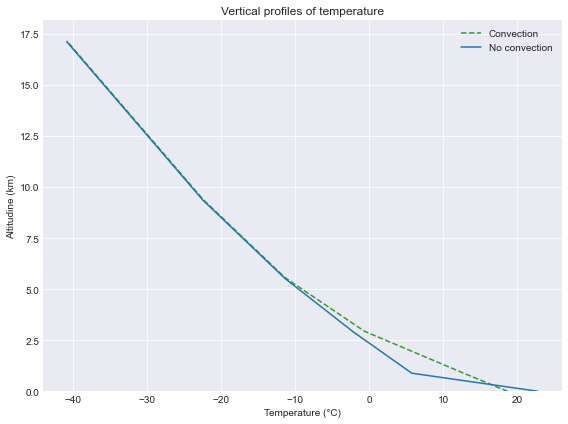

In [5]:
# Plot the result
ZT_6_5 = radiative_convective_model(lapse_rates_conv)
ZT_100 = radiative_convective_model(lapse_rates_noconv)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Altitudine (km)")
ax.set_title("Vertical profiles of temperature")
ax.set_ylim(0, ZT_6_5[:,0].max() + 1)

# Lapse rate: 6.5K/km (a value close to the observed lapse rate)
ax.plot(ZT_6_5[:,1] - 273.15, ZT_6_5[:,0], c="tab:green", linestyle="dashed")
# Lapse rate: 100K/km (No Convection)
ax.plot(ZT_100[:,1] - 273.15, ZT_100[:,0], c="tab:blue")
ax.legend(["Convection", "No convection"])
ax.grid()
plt.tight_layout()
plt.show()
